# Project - Gamma Ray Classification

## Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, LearningCurveDisplay
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC

### Data Loading and Visualization

In [2]:
magic_df = pd.read_csv("magic04.data")
print(f"Data shape: {magic_df.shape}")
display(magic_df)

Data shape: (19020, 11)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [3]:
display(magic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


None

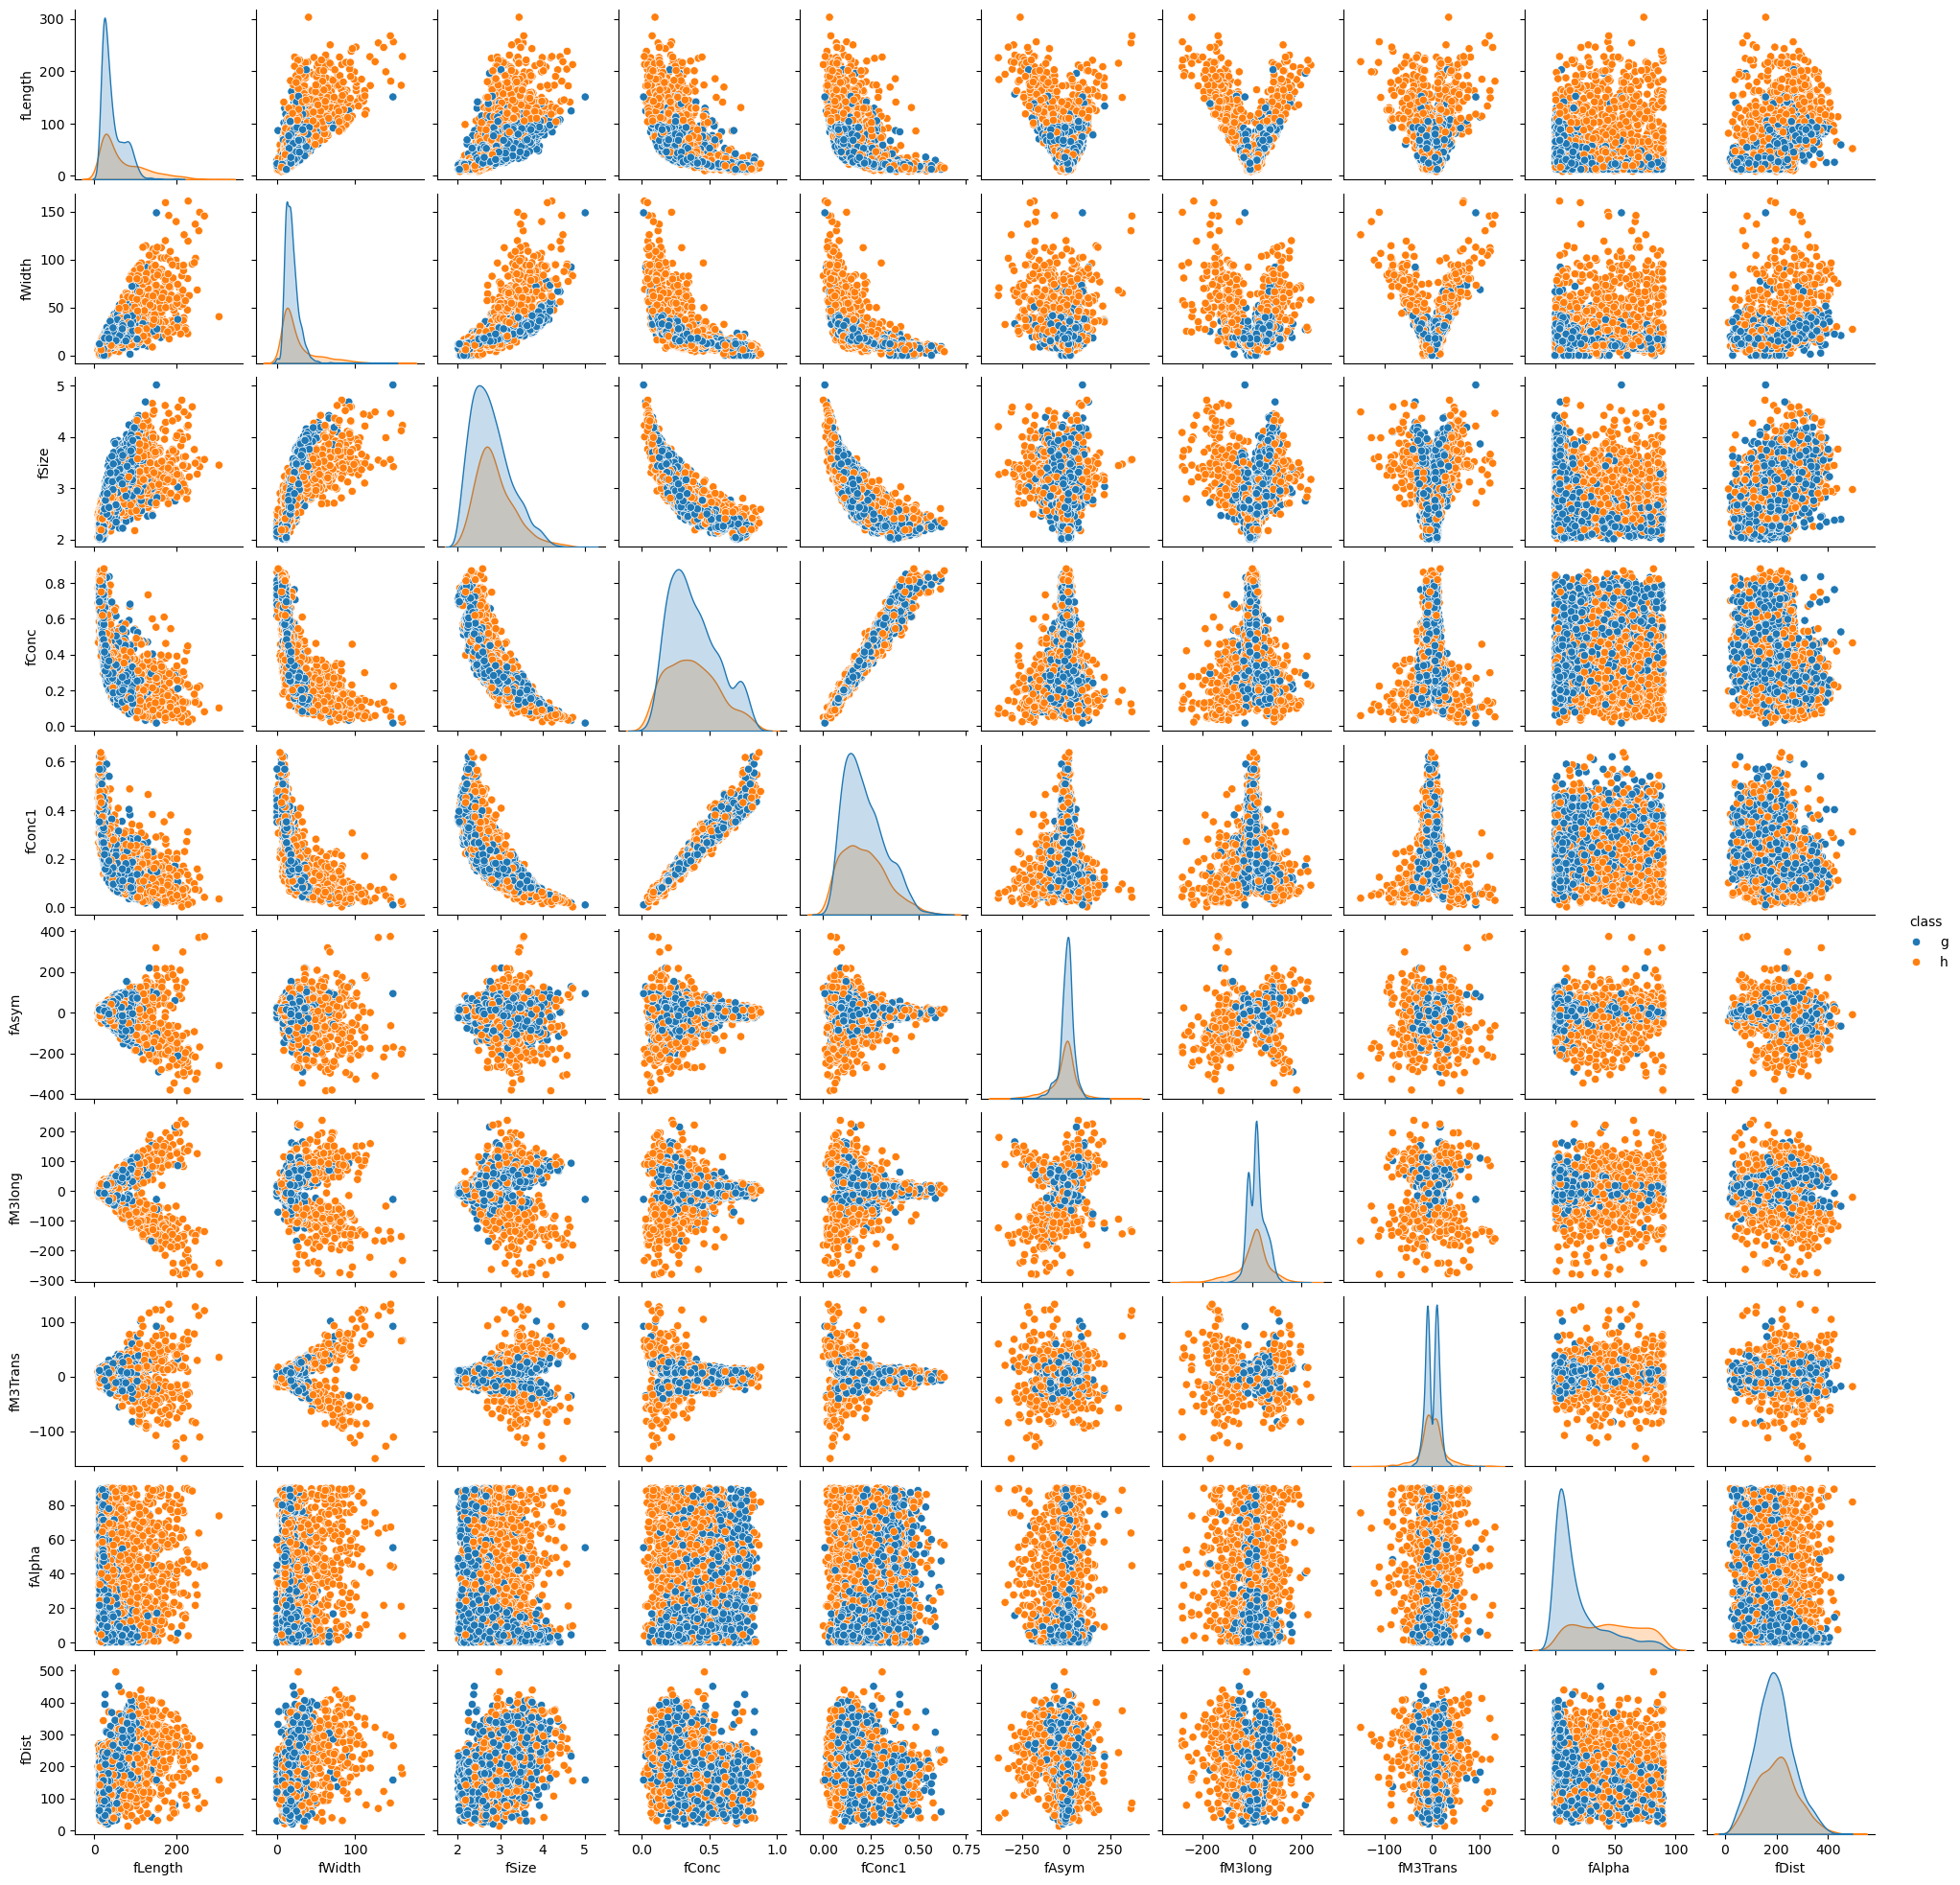

In [31]:
sample = magic_df.sample(frac=0.2)
pairplot(sample, hue="class", height=2)

In [4]:
display(magic_df.drop(columns="class").corr())

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3long,fM3Trans,fAlpha,fDist
fLength,1.000000,0.770512,0.702454,-0.630999,-0.598145,-0.368556,-0.119747,0.013389,-0.008777,0.418466
fWidth,0.770512,1.000000,0.717517,-0.609779,-0.581141,-0.266961,-0.176234,0.039744,0.066061,0.336816
fSize,0.702454,0.717517,1.000000,-0.850850,-0.808835,-0.159863,0.095157,0.015455,-0.186675,0.437041
fConc,-0.630999,-0.609779,-0.850850,1.000000,0.976412,0.112272,-0.121899,-0.011294,0.235272,-0.328332
fConc1,-0.598145,-0.581141,-0.808835,0.976412,1.000000,0.100159,-0.118769,-0.010966,0.229799,-0.304625
fAsym,-0.368556,-0.266961,-0.159863,0.112272,0.100159,1.000000,0.274045,0.002553,-0.055689,-0.206730
fM3long,-0.119747,-0.176234,0.095157,-0.121899,-0.118769,0.274045,1.000000,-0.017197,-0.186275,0.037025
fM3Trans,0.013389,0.039744,0.015455,-0.011294,-0.010966,0.002553,-0.017197,1.000000,0.004659,0.011427
fAlpha,-0.008777,0.066061,-0.186675,0.235272,0.229799,-0.055689,-0.186275,0.004659,1.000000,-0.220556
fDist,0.418466,0.336816,0.437041,-0.328332,-0.304625,-0.206730,0.037025,0.011427,-0.220556,1.000000


In [5]:
magic_describe = magic_df.describe()
display(magic_describe)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


(array(['g', 'h'], dtype=object), array([12332,  6688]))


<Axes: xlabel='class', ylabel='Count'>

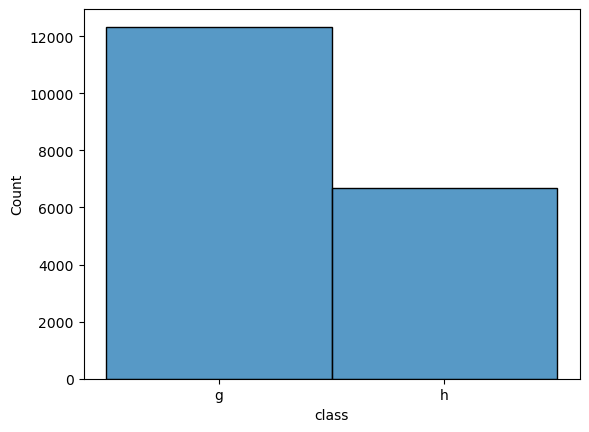

In [10]:
print(np.unique(magic_df["class"], return_counts=True))
sns.histplot(magic_df["class"])

## Data Preprocessing

In [12]:
labelnames = ['gamma', 'hadron']

In [13]:
def display_confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray):
    cf = confusion_matrix(y_true=y_true,y_pred=y_pred, labels=[1,0])
    cf_disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=labelnames)
    cf_disp.plot()
    plt.show()

In [14]:
def display_roc_curve(clf: object, X: np.ndarray, y: np.ndarray):
    model = type(clf).__name__
    if model == "SGDClassifier":
        scores = clf.decision_function(X)
    else:
        scores = clf.predict_proba(X)[:,1]
    fpr, tpr, _ = roc_curve(y_tst,scores, pos_label=1)
    auc = round(roc_auc_score(y_tst,scores),3)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim(0,0.2)
    plt.plot([0,1],[0,1],label="Random Guess", linestyle='dashed')
    plt.plot(fpr,tpr,label=f"{model}: AUC={auc}")
    plt.legend()

In [15]:
def get_test_train_valid_data(X,y):
    X_trn,X_tst,y_trn,y_tst = train_test_split(X,y,train_size=0.8,random_state=42)
    X_trn,X_vld,y_trn,y_vld = train_test_split(X_trn,y_trn, train_size=0.8,random_state=42)

    return X_trn,y_trn,X_vld,y_vld,X_tst,y_tst

In [16]:
def process_data(degree: int=None, drop_features: list=None):
    X = magic_df.drop(columns="class")
    y = magic_df["class"].map({'g':1,'h':0})
    if drop_features  is not None:
        X = X.drop(columns=drop_features)
    if degree is not None and degree > 1:
        X = PolynomialFeatures(degree=degree).fit_transform(X)
    X_trn,y_trn,X_vld,y_vld,X_tst,y_tst = get_test_train_valid_data(X,y)
    scaler = MinMaxScaler()
    X_trn = scaler.fit_transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)

    return X_trn,y_trn,X_vld,y_vld,X_tst,y_tst

## Stochastic Gradient Descent Classifier w/ Perceptron loss

### Training, Validation, Testing Data Split:
To better compare the Perceptron and Logistic Regression models, we will use the same proportions and polynomial features for both models

#### Training 

Accuracy: 0.8314717477003942


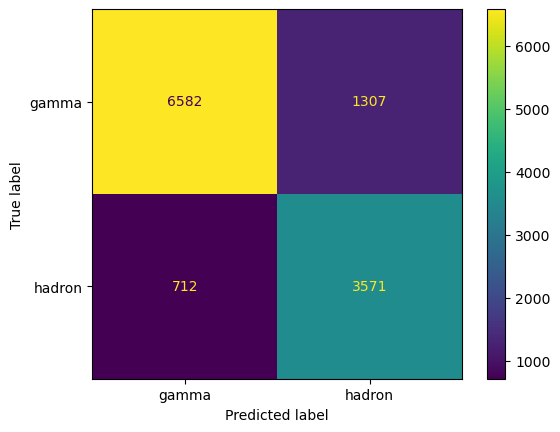

In [79]:
X_trn,y_trn,X_vld,y_vld,X_tst,y_tst = process_data(degree=4)
perc = SGDClassifier(loss='perceptron', penalty=None, random_state=42,learning_rate='adaptive', eta0=0.2, class_weight='balanced')
perc.fit(X_trn,y_trn)
y_hats = perc.predict(X_trn)
acc = perc.score(X_vld,y_vld)
print(f"Accuracy: {acc}")
display_confusion_matrix(y_trn,y_hats)

### Validation

Accuracy: 0.8314717477003942


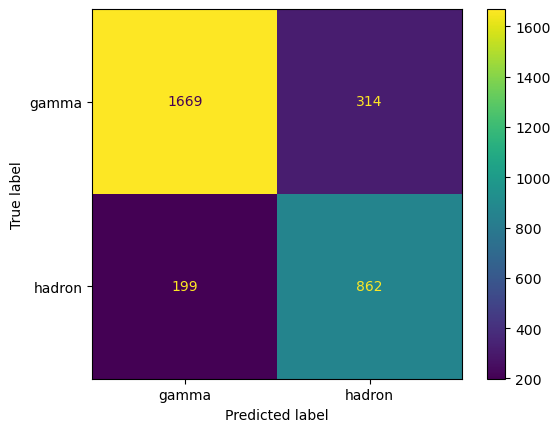

In [80]:
y_vld_hats = perc.predict(X_vld)
acc = perc.score(X_vld,y_vld)
print(f"Accuracy: {acc}")
display_confusion_matrix(y_vld,y_vld_hats)

#### Testing

Accuracy: 0.8209779179810726
Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1344
           1       0.88      0.83      0.86      2460

    accuracy                           0.82      3804
   macro avg       0.80      0.82      0.81      3804
weighted avg       0.83      0.82      0.82      3804



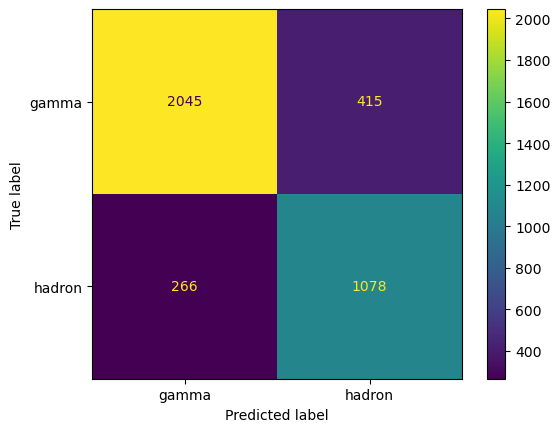

In [81]:
y_tst_hats = perc.predict(X_tst)
acc = perc.score(X_tst,y_tst)
print(f"Accuracy: {acc}")
print(f"Classification Report: \n{classification_report(y_tst,y_tst_hats)}")
display_confusion_matrix(y_tst,y_tst_hats)
#display_roc_curve(perc, X_tst, y_tst)

### Logistic Regression

#### Training

Accuracy: 0.8668255011501808


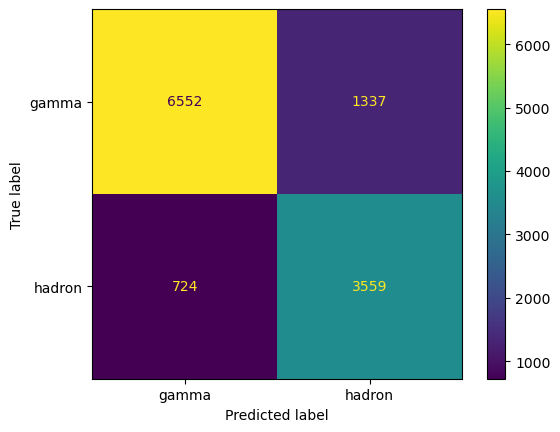

In [29]:
X_trn,y_trn,X_vld,y_vld,X_tst,y_tst = process_data(degree=4)
log_reg = LogisticRegression(penalty=None, max_iter=100000, class_weight='balanced')
log_reg.fit(X_trn,y_trn)
log_reg_preds = log_reg.predict(X_trn)
acc = log_reg.score(X_trn,y_trn)
print(f"Accuracy: {acc}")
#LearningCurveDisplay.from_estimator(log_reg, X_trn, y_trn)
display_confusion_matrix(y_trn,y_hats)

#### Validation

Accuracy: 0.8656373193166885


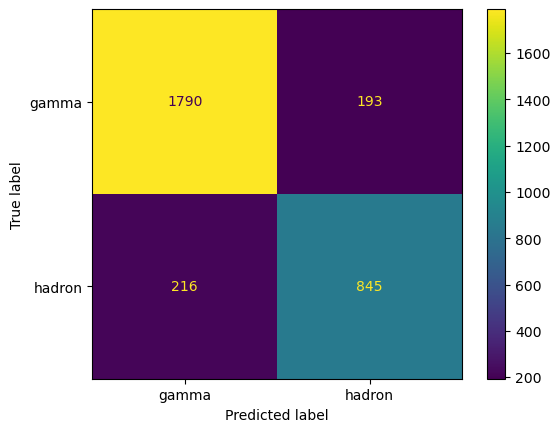

In [30]:
y_vld_hats = log_reg.predict(X_vld)
acc = log_reg.score(X_vld,y_vld)
print(f"Accuracy: {acc}")
display_confusion_matrix(y_vld,y_vld_hats)

#### Testing

Accuracy: 0.8617245005257623
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1344
           1       0.89      0.89      0.89      2460

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



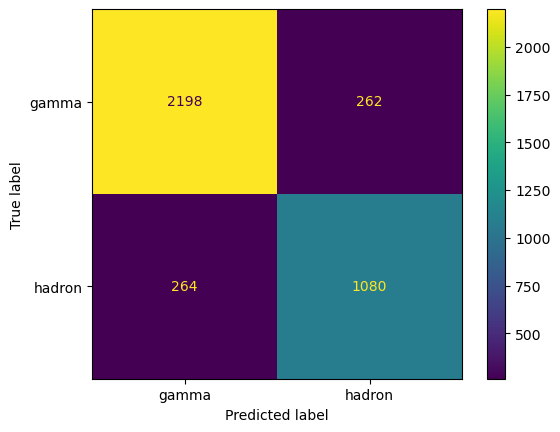

In [32]:
y_tst_hats = log_reg.predict(X_tst)
acc = log_reg.score(X_tst,y_tst)
print(f"Accuracy: {acc}")
print(f"Classification Report: \n{classification_report(y_tst,y_tst_hats)}")
display_confusion_matrix(y_tst,y_tst_hats)
#display_roc_curve(log_reg, X_tst, y_tst)

## Support Vector Classification

#### Training

Accuracy: 0.8655110088728228


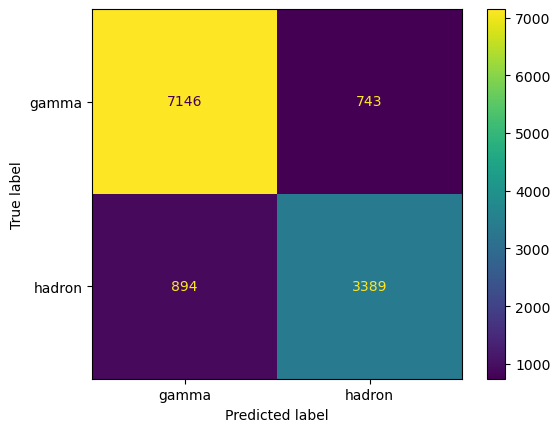

In [70]:
X_trn,y_trn,X_vld,y_vld,X_tst,y_tst = process_data(degree=1)
svc = SVC(kernel='poly', degree=4, max_iter=3000000, probability=True, class_weight='balanced')
svc.fit(X_trn,y_trn)
y_pred = svc.predict(X_trn)
acc = svc.score(X_trn,y_trn)
print(f"Accuracy: {acc}")
#LearningCurveDisplay.from_estimator(svc, X_trn, y_trn)
display_confusion_matrix(y_trn,y_pred)

#### Validation

Accuracy: 0.8676084099868594


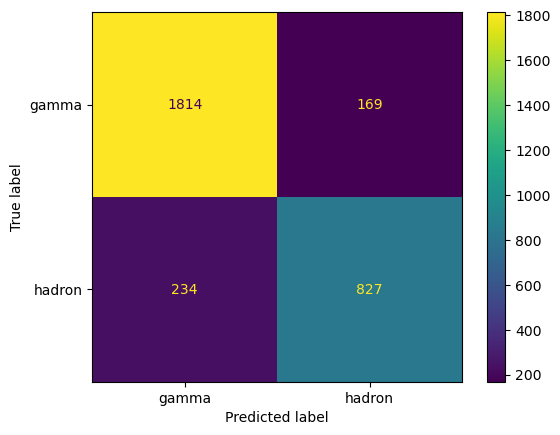

In [71]:
y_vld_hats = svc.predict(X_vld)
acc = svc.score(X_vld,y_vld)
print(f"Accuracy: {acc}")
display_confusion_matrix(y_vld,y_vld_hats)

#### Testing

Accuracy: 0.8596214511041009
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1344
           1       0.88      0.91      0.89      2460

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



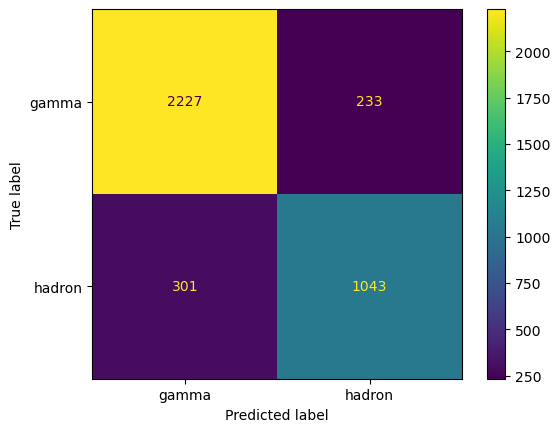

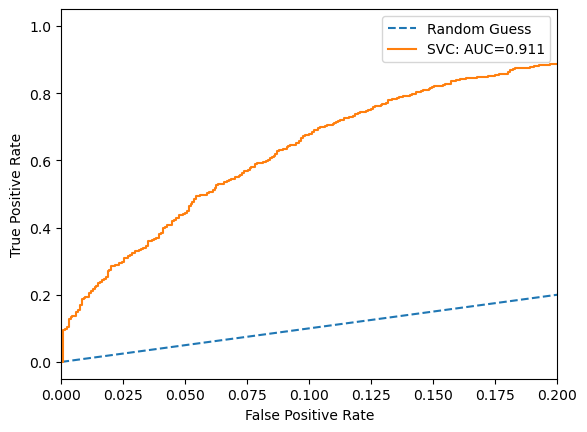

In [74]:
y_tst_hats = svc.predict(X_tst)
acc = svc.score(X_tst,y_tst)
print(f"Accuracy: {acc}")
print(f"Classification Report: \n{classification_report(y_tst,y_tst_hats)}")
display_confusion_matrix(y_tst,y_tst_hats)
display_roc_curve(svc, X_tst, y_tst)

## Neural Network with TensoFlow (Extra)

381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step
Train MSE: 0.18116265617141963
Train RMSE: 0.42563206666253384
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step
Validation MSE: 0.17926657988448294
Validation RMSE: 0.42339884256393867
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
Test MSE: 0.18014096476053124
Test RMSE: 0.4244301647627454


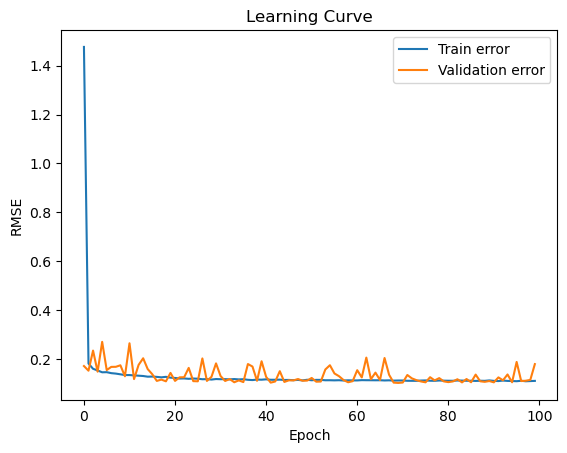

In [41]:
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_squared_error as mse
import tensorflow as tf
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras import Model, Input, layers, optimizers, losses

X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = process_data()

input_layer = Input(shape=(X_trn.shape[1],))
hidden_layer_1 = layers.Dense(50, activation='sigmoid')(input_layer)
hidden_layer_2 = layers.Dense(50, activation='sigmoid')(hidden_layer_1)
output_layer = layers.Dense(1)(hidden_layer_2)

# full model composition
full_nn = Model(inputs=input_layer, outputs=output_layer)
full_nn.compile(optimizer=optimizers.RMSprop(learning_rate=0.1), loss=losses.MeanSquaredError())
hist = full_nn.fit(X_trn,y_trn, epochs=100, batch_size=80, validation_data=(X_vld,y_vld), verbose=0)

#extract the losses
trn_error = hist.history['loss']
vld_error = hist.history['val_loss']

# display the MSE's and RMSE's
y_trn_hats = full_nn.predict(X_trn)
print(f"Train MSE: {mse(y_trn,y_trn_hats)}")
print(f"Train RMSE: {rmse(y_trn,y_trn_hats)}")
y_vld_hats = full_nn.predict(X_vld)
print(f"Validation MSE: {mse(y_vld,y_vld_hats)}")
print(f"Validation RMSE: {rmse(y_vld,y_vld_hats)}")
y_tst_hats = full_nn.predict(X_tst)
print(f"Test MSE: {mse(y_tst,y_tst_hats)}")
print(f"Test RMSE: {rmse(y_tst,y_tst_hats)}")

plt.plot(trn_error, label='Train error')
plt.plot(vld_error, label='Validation error')
plt.title("Learning Curve")
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.legend()
plt.show()